1. Understing the Dataset structure:

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv("c:/MBAN- Schulich/MBAN- Sem 2/Data Science 2/Final Exam/Recipe Reviews and User Feedback Dataset.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB
None


In [6]:
df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [7]:
print(df.head(30))

    Unnamed: 0  recipe_number  recipe_code         recipe_name  \
0            0              1        14299  Creamy White Chili   
1            1              1        14299  Creamy White Chili   
2            2              1        14299  Creamy White Chili   
3            3              1        14299  Creamy White Chili   
4            4              1        14299  Creamy White Chili   
5            5              1        14299  Creamy White Chili   
6            6              1        14299  Creamy White Chili   
7            7              1        14299  Creamy White Chili   
8            8              1        14299  Creamy White Chili   
9            9              1        14299  Creamy White Chili   
10          10              1        14299  Creamy White Chili   
11          11              1        14299  Creamy White Chili   
12          12              1        14299  Creamy White Chili   
13          13              1        14299  Creamy White Chili   
14        

In [8]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

In [9]:
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
import nltk
from tensorflow.keras.callbacks import EarlyStopping
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

2. Preprocessing for the model:

In [ ]:
# Downloading stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nazil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Filling missing values in the 'text' column
df['text'] = df['text'].fillna("no_comment")

# Performing Text cleaning function
def clean_text(t):
    t = t.lower()  
    t = re.sub(r'<.*?>', '', t) 
    t = re.sub(r'[^a-z0-9\s]', '', t) 
    t = re.sub(r'\d+', '', t) 
    tokens = word_tokenize(t)  
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  
    t = " ".join(tokens) 
    return t

# Applying cleaning function to the text data
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
# Checking the distribution of stars
print("Stars distribution:")
print(df['stars'].value_counts())

Stars distribution:
stars
5    13829
0     1696
4     1655
3      490
1      280
2      232
Name: count, dtype: int64


3. Preparing the Target Variable:

In [ ]:
# Preparing features (X) and target (y)
X = df['clean_text'].values
y = df['stars'].values  # Assuming 'stars' is the target variable (0 to 5)

# Convert target to categorical (for multi-class classification)
y_cat = to_categorical(y, num_classes=6)  # Assuming 6 classes (0-5 stars)

4. Spliting the dataset in Train-Test Split:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [15]:
print("Train size:", len(X_train), "Val size:", len(X_val), "Test size:", len(X_test))

Train size: 10908 Val size: 3637 Test size: 3637


5. Setting up Text Tokenization and Padding:

In [ ]:
# Tokenizer setup
vocabulary_size = 20000
max_len = 100

tokenizer = Tokenizer(num_words=vocabulary_size, oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
def preprocess_text_data(X, tokenizer, max_len):
    seq = tokenizer.texts_to_sequences(X)
    seq = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    return seq

# Preprocess the training, validation, and test data
X_train_seq = preprocess_text_data(X_train, tokenizer, max_len)
X_val_seq = preprocess_text_data(X_val, tokenizer, max_len)
X_test_seq = preprocess_text_data(X_test, tokenizer, max_len)

6. Build the Deep Learning Model- Multi-Class Classification:

In [ ]:
# Define the model architecture with Early Stopping
embedding_dim = 64
input_text = Input(shape=(max_len,))
x = layers.Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=max_len)(input_text)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(32))(x)
x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(6, activation='softmax')(x)

# Compile the model
model = Model(inputs=input_text, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\nazil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 64)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,389,542 (5.30 MB)

 Trainable params: 1,389,542 (5.30 MB)

 Non-trainable params: 0 (0.00 B)

7. Training the Model:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=10,
    batch_size=128,
    callbacks=[early_stopping]
)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.7233 - loss: 1.1115 - val_accuracy: 0.7608 - val_loss: 0.8510
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.7571 - loss: 0.8201 - val_accuracy: 0.7517 - val_loss: 0.7618
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - accuracy: 0.7761 - loss: 0.6919 - val_accuracy: 0.7655 - val_loss: 0.7285
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.8087 - loss: 0.5864 - val_accuracy: 0.7663 - val_loss: 0.7327
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 255ms/step - accuracy: 0.8329 - loss: 0.5169 - val_accuracy: 0.7476 - val_loss: 0.7790
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.8731 - loss: 0.4172 - val_accuracy: 0.7589 - val_loss: 0.8304


8. Evaluating the Model on Test Set:

In [19]:
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
print(f'Test Accuracy: {test_acc}')

114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7685 - loss: 0.7211
Test Accuracy: 0.7610667943954468


9. Visualizing the Training/Validation Accuracy and Loss:

In [20]:
import matplotlib.pyplot as plt

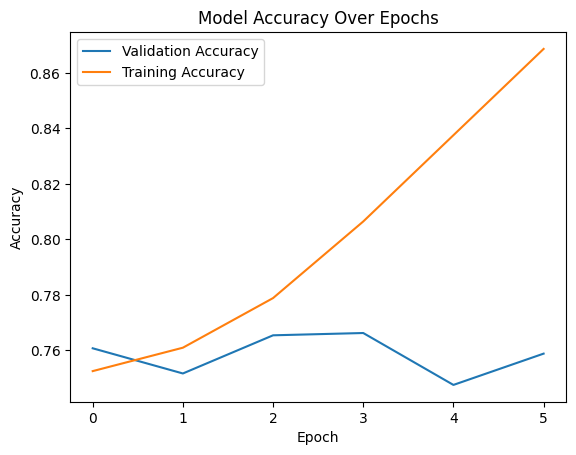

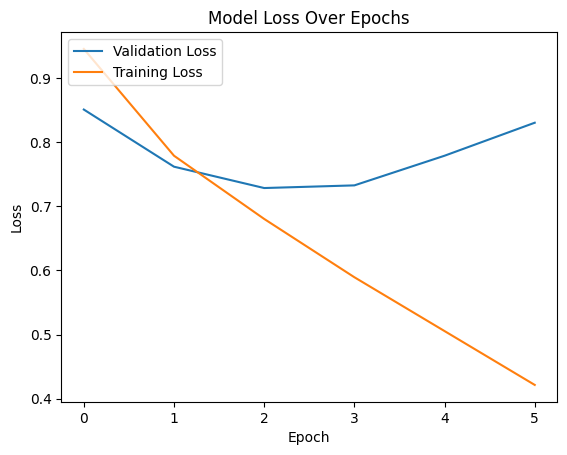

In [21]:
# Plot accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
